# Lecture 3

## Imports

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy as sc

## Excersise 3.1

In [ ]:
# We are trying to make predictions y hat based on our observations X where each column of X has been copied/duplicated
# Since the column space of X has not changed, there is no impact on our predictions y hat


## Excersise 3.2.2


In [2]:
def sim_corr_lm(n,p,rho,beta,sigma):
    """
    Simulate a design matrix with all columns having marginal correlation rho
    """
    assert p < n and rho < 1 and rho >= 0, "p must be less than n and rho in [0,1)"
    Sigma = (1 - rho)*np.eye(p) + rho*np.ones((p,p))
    X = np.random.multivariate_normal(np.zeros(p),Sigma,n)
    y = X @ beta + np.random.normal(0,sigma,n)
    return X,y

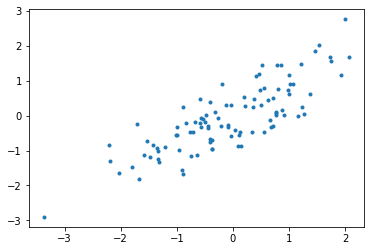

In [4]:
n, p, rho = 100, 2, .8
beta = np.random.normal(0,1,p)
sigma = 1.
X, y = sim_corr_lm(n,p,rho,beta,sigma)
plt.plot(X[:,0],X[:,1],'.')
plt.show()

## My answer to 3.2.2


In [23]:
num_runs = 100
rhos = [0, 0.2, 0.4, 0.8, 0.9, 0.95, 0.99]

beta_var = np.zeros((len(rhos), 1))
index = 0

for rho in rhos:
    
    # Initialize an array for betas for each trial
    beta_sim = np.zeros((num_runs, 1))
    
    for trial in range(0, num_runs):
        
        # Find X an y
        X,y = sim_corr_lm(n,p,rho,beta,sigma)
        
        # Fit using a linear regression model
        beta_sim[trial] = linear_model.LinearRegression(fit_intercept=False).fit(X,y).coef_[0]
    
    beta_var[index] = np.array(beta_sim).var()
    
    # Increment our index variable
    index += 1
    
        

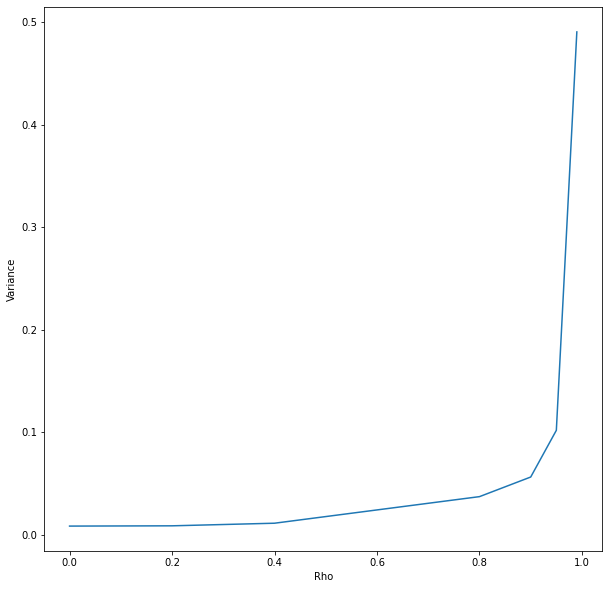

In [24]:
plt.figure(figsize=(10,10))
plt.plot(rhos, beta_var)
plt.xlabel("Rho")
plt.ylabel("Variance")
plt.show()

## Excersise 3.3


In [31]:
## Simulate again
n, p, rho = 100, 8, .8
beta = np.random.normal(0,1,p)
sigma = 1.
X, y = sim_corr_lm(n,p,rho,beta,sigma)

# Find the Singular value decomposition of X
U,D,Vt = sc.linalg.svd(X)

## My Answer


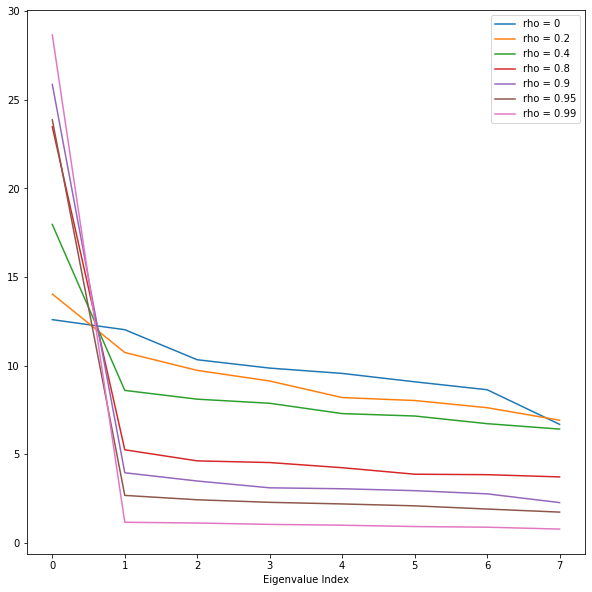

In [36]:
# Initialize a figure for the diagonal entries plot
plt.figure(figsize=(10,10))

for rho in rhos:
    X,y = sim_corr_lm(n,p,rho,beta,sigma)
    
    # Find the singular value decomposition
    U,D,Vt = sc.linalg.svd(X)
    
    # plot d
    plt.plot(D, label="rho = " + str(rho))

plt.legend()
plt.xlabel("Eigenvalue Index")
plt.show()